# CoinMarketCap API

・CoinMarketCap JSON API Documentation

　https://coinmarketcap.com/api/
 
・Python用にCoinMarketCapの値を取得するライブラリがある

　How to install:pip install coinmarketcap

　https://qiita.com/HirofumiYashima/items/ce1e68b47ce41b53f0ed



In [155]:
import coinmarketcap as cap
cmc = cap.Market()
data = cmc.ticker(convert='JPY')

In [156]:
import types
type(data)

list

In [157]:
len(data)

1260

In [158]:
print data[0:1]

[{u'last_updated': u'1509896651', u'symbol': u'BTC', u'rank': u'1', u'percent_change_24h': u'2.74', u'price_btc': u'1.0', u'cached': False, u'percent_change_1h': u'-0.59', u'id': u'bitcoin', u'market_cap_usd': u'125756846954', u'price_usd': u'7546.16', u'name': u'Bitcoin', u'24h_volume_usd': u'2330600000.0', u'percent_change_7d': u'27.47', u'24h_volume_jpy': u'265828236000.0000000000', u'total_supply': u'16665012.0', u'market_cap_jpy': u'14343825963564', u'available_supply': u'16665012.0', u'price_jpy': u'860715.0096'}]


In [159]:
# prettyprint
# List, Jsonデータを簡単に見やすく表示してくれるライブラリ
# pip install prettyprint
from prettyprint import pp
pp( data[0:2] )

[
    {
        "24h_volume_jpy": "265828236000.0000000000", 
        "24h_volume_usd": "2330600000.0", 
        "available_supply": "16665012.0", 
        "cached": false, 
        "id": "bitcoin", 
        "last_updated": "1509896651", 
        "market_cap_jpy": "14343825963564", 
        "market_cap_usd": "125756846954", 
        "name": "Bitcoin", 
        "percent_change_1h": "-0.59", 
        "percent_change_24h": "2.74", 
        "percent_change_7d": "27.47", 
        "price_btc": "1.0", 
        "price_jpy": "860715.0096", 
        "price_usd": "7546.16", 
        "rank": "1", 
        "symbol": "BTC", 
        "total_supply": "16665012.0"
    }, 
    {
        "24h_volume_jpy": "38919781320.0", 
        "24h_volume_usd": "341222000.0", 
        "available_supply": "95540022.0", 
        "cached": false, 
        "id": "ethereum", 
        "last_updated": "1509896651", 
        "market_cap_jpy": "3232322934656", 
        "market_cap_usd": "28338794798.0", 
        "name": "Ethe

In [160]:
btc_data = [elem for elem in data if elem["symbol"] == 'BTC']
len(btc_data)

1

In [162]:
pp(btc_data[0])

{
    "24h_volume_jpy": "265828236000.0000000000", 
    "24h_volume_usd": "2330600000.0", 
    "available_supply": "16665012.0", 
    "cached": false, 
    "id": "bitcoin", 
    "last_updated": "1509896651", 
    "market_cap_jpy": "14343825963564", 
    "market_cap_usd": "125756846954", 
    "name": "Bitcoin", 
    "percent_change_1h": "-0.59", 
    "percent_change_24h": "2.74", 
    "percent_change_7d": "27.47", 
    "price_btc": "1.0", 
    "price_jpy": "860715.0096", 
    "price_usd": "7546.16", 
    "rank": "1", 
    "symbol": "BTC", 
    "total_supply": "16665012.0"
}


In [164]:
print btc_data[0]['rank'], btc_data[0]['price_jpy'], \
      btc_data[0]['price_usd'], btc_data[0]['price_btc']

1 860715.0096 7546.16 1.0


# CoinMarketCap's HistoricalData

1. 各コインのページから"HisoricalData"ページを参照する限り、以下の法則が分かった。

    1.1. URLは"/historical-data/?start=20130428&end=現在日時(YYYYMMDD)"となる
    
    1.2. ページのソースを見る限り,tableに格納されているのでスクレイピングは簡単そう
    
    1.3. どの通貨のもURLは1.1.の固定でエラーなく取得できる(サイトができたのが20130428?)

In [165]:
# 以下サンプル
# https://coinmarketcap.com/currencies/iota/historical-data/?start=20130428&end=20171105

In [166]:
# スクレイピングの参考サイト
# http://vaaaaaanquish.hatenablog.com/entry/2017/06/25/202924
# 基本的に、パターンは決まっていることが多い。
# ソースを取得して、タグ解析して必要なデータを抽出する
# 
#↓今回はテーブルのデータを取得した例。よくあるやつ。↓
# https://qiita.com/hujuu/items/b0339404b8b0460087f9

import requests
from bs4 import BeautifulSoup

resp = requests.get("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20171105")
soup = BeautifulSoup(resp.text, "html.parser")

#print soup
#print soup.get("table")

table = soup.findAll("table",{"class":"table"})[0]
rows  = table.findAll("tr")

print table

<table class="table">
<thead>
<tr>
<th class="text-left">Date</th>
<th class="text-right">Open</th>
<th class="text-right">High</th>
<th class="text-right">Low</th>
<th class="text-right">Close</th>
<th class="text-right">Volume</th>
<th class="text-right">Market Cap</th>
</tr>
</thead>
<tbody>
<tr class="text-right">
<td class="text-left">Nov 04, 2017</td>
<td>7164.48</td>
<td>7492.86</td>
<td>7031.28</td>
<td>7379.95</td>
<td>2,483,800,000</td>
<td>119,376,000,000</td>
</tr>
<tr class="text-right">
<td class="text-left">Nov 03, 2017</td>
<td>7087.53</td>
<td>7461.29</td>
<td>7002.94</td>
<td>7207.76</td>
<td>3,369,860,000</td>
<td>118,084,000,000</td>
</tr>
<tr class="text-right">
<td class="text-left">Nov 02, 2017</td>
<td>6777.77</td>
<td>7367.33</td>
<td>6758.72</td>
<td>7078.50</td>
<td>4,653,770,000</td>
<td>112,910,000,000</td>
</tr>
<tr class="text-right">
<td class="text-left">Nov 01, 2017</td>
<td>6440.97</td>
<td>6767.31</td>
<td>6377.88</td>
<td>6767.31</td>
<td>2,870,320,

In [60]:
# 取得したヒストリカルデータのcsvファイル化
import csv
import io
csvFile = open("HistoricalData/test.csv", 'w')
writer = csv.writer(csvFile, lineterminator='\n')

try:
    for row in rows:
        csvRow = []
        for cell in row.findAll(['td', 'th']):
            csvRow.append(cell.get_text())
        writer.writerow(csvRow)
finally:
    csvFile.close()

# 時価総額上位銘柄のヒストリカルデータを一括保存

In [61]:
data = cmc.ticker(convert='JPY')

In [103]:
data[0]
# 最初から時価総額順になっている

{u'24h_volume_jpy': u'240423652200.0000000000',
 u'24h_volume_usd': u'2107870000.0',
 u'available_supply': u'16664550.0',
 u'cached': False,
 u'id': u'bitcoin',
 u'last_updated': u'1509873548',
 u'market_cap_jpy': u'14170326229987',
 u'market_cap_usd': u'124235720060',
 u'name': u'Bitcoin',
 u'percent_change_1h': u'-0.01',
 u'percent_change_24h': u'3.74',
 u'percent_change_7d': u'28.61',
 u'price_btc': u'1.0',
 u'price_jpy': u'850327.5654',
 u'price_usd': u'7455.09',
 u'rank': u'1',
 u'symbol': u'BTC',
 u'total_supply': u'16664550.0'}

In [102]:
for i in range(0, 10):
    print (i+1), data[i]['symbol'], data[i]['market_cap_jpy']

1 BTC 14170326229987
2 ETH 3261943029566
3 BCH 1169223830224
4 XRP 897150012789
5 LTC 337135814711
6 DASH 240452832356
7 NEO 194382819930
8 XEM 173170112201
9 XMR 153046852440
10 ETC 132156223619


# スクレイピング実行

In [108]:
import requests
from bs4 import BeautifulSoup
import csv

# スクレイピング情報
TOP = 10
BASE_URL = "https://coinmarketcap.com/currencies/"
PERIOD   = "/historical-data/?start=20130428&end=20171105"

# データ保存用情報
WRITE_FOLDER = "HistoricalData/"

for i in range(0, TOP):
    print("{0}/{1}, Symbol:{2}, Loading...".format(i+1, TOP, data[i]['symbol']))
    
    # スクレイピング
    url = BASE_URL + data[i]['id'] + PERIOD
    resp = requests.get( url )
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.findAll("table",{"class":"table"})[0]
    rows  = table.findAll("tr")
    
    # データ保存
    path = WRITE_FOLDER + "RANK-{0:04d}-".format(i+1) + data[i]['symbol'] + ".csv"
    csvFile = open(path, 'w')
    writer = csv.writer(csvFile, lineterminator='\n')
    
    try:
        for row in rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            writer.writerow(csvRow)
    
    finally:
        csvFile.close()
        print("---> Done.")

1/10, Symbol:BTC, Loading...
---> Done.
2/10, Symbol:ETH, Loading...
---> Done.
3/10, Symbol:BCH, Loading...
---> Done.
4/10, Symbol:XRP, Loading...
---> Done.
5/10, Symbol:LTC, Loading...
---> Done.
6/10, Symbol:DASH, Loading...
---> Done.
7/10, Symbol:NEO, Loading...
---> Done.
8/10, Symbol:XEM, Loading...
---> Done.
9/10, Symbol:XMR, Loading...
---> Done.
10/10, Symbol:ETC, Loading...
---> Done.


# [参考]価格変化を可視化

In [115]:
import pandas as pd
%matplotlib inline

In [119]:
df = pd.read_csv('HistoricalData/RANK-0001-BTC.csv')
df.index = pd.DatetimeIndex(df.Date)
df = df.sort_index()
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


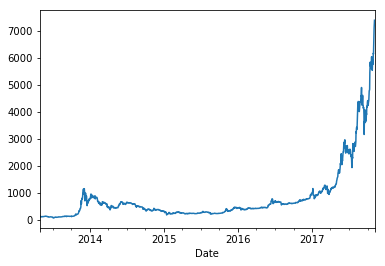

In [120]:
df.Close.plot()

# [参考]取得した価格データを一括描画

In [122]:
import os

# 保存したヒストリカルデータのファイル名を取得
files = os.listdir('HistoricalData/')

df2 = pd.DataFrame()
for file_name in files:
    print(file_name)
    
    # データをロードして連結していく
    tmp = pd.read_csv('HistoricalData/'+file_name)
    tmp.index = pd.DatetimeIndex(tmp.Date)
    tmp = tmp.sort_index()
    tmp['Symbol'] = file_name[10:-4]
    
    df2 = df2.append(tmp)
    

RANK-0001-BTC.csv
RANK-0002-ETH.csv
RANK-0003-BCH.csv
RANK-0004-XRP.csv
RANK-0005-LTC.csv
RANK-0006-DASH.csv
RANK-0007-NEO.csv
RANK-0008-XEM.csv
RANK-0009-XMR.csv
RANK-0010-ETC.csv


In [124]:
df2.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Symbol
Date,,,,,,,,
2013-04-28,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000",BTC
2013-04-29,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000",BTC
2013-04-30,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000",BTC
2013-05-01,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000",BTC
2013-05-02,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000",BTC


In [125]:
df2.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Symbol
Date,,,,,,,,
2017-10-31,"Oct 31, 2017",10.87,10.94,10.62,10.62,"27,241,200","1,053,730,000",ETC
2017-11-01,"Nov 01, 2017",10.60,10.67,10.25,10.26,"30,011,800","1,028,310,000",ETC
2017-11-02,"Nov 02, 2017",10.27,10.38,9.82,10.24,"39,190,200","996,639,000",ETC
2017-11-03,"Nov 03, 2017",10.24,12.73,10.20,12.66,"146,543,000","993,753,000",ETC
2017-11-04,"Nov 04, 2017",12.63,12.65,11.23,11.89,"149,319,000","1,226,190,000",ETC


Symbol
BCH     Axes(0.125,0.125;0.775x0.755)
BTC     Axes(0.125,0.125;0.775x0.755)
DASH    Axes(0.125,0.125;0.775x0.755)
ETC     Axes(0.125,0.125;0.775x0.755)
ETH     Axes(0.125,0.125;0.775x0.755)
LTC     Axes(0.125,0.125;0.775x0.755)
NEO     Axes(0.125,0.125;0.775x0.755)
XEM     Axes(0.125,0.125;0.775x0.755)
XMR     Axes(0.125,0.125;0.775x0.755)
XRP     Axes(0.125,0.125;0.775x0.755)
Name: Close, dtype: object

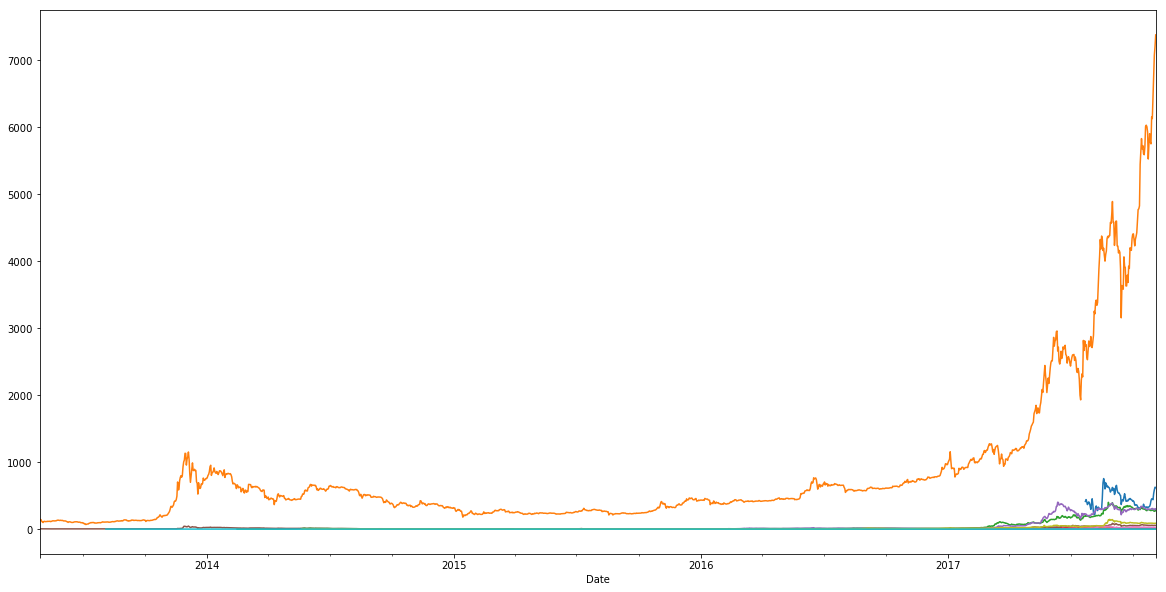

In [133]:
df2.groupby("Symbol").Close.plot( figsize=(20,10) )

# [参考]Bokehでグラフを作成

In [153]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import Dark2_5 as palette

# 色を自動で決めるためにイテレータを使いパレットを参照
# bokehは自動で色をつけてくれないため。。他のライブラリはできるのに。
# itertoolsのPython実装
# http://docs.python.org/3/library/itertools.html
# 
# http://d.hatena.ne.jp/mFumi/20130812/1376289939
# next(colors)で次を参照できる
import itertools
colors = itertools.cycle(palette)  

# jupyter notebook利用時のおまじない
output_notebook()

Loading BokehJS ...

In [154]:
# bokehには時系列データ(株価データ)を可視化する際のサンプルが用意されている
# https://bokeh.pydata.org/en/latest/docs/gallery/stocks.html

p1 = figure(x_axis_type="datetime", title="Crypto Currency Closing Prices")

# PandasでGroupbyしたうえでfor-loopする場合はこの構文を利用する
# titleがGroupbyした際の値、groupはDataFrame
for title, group in df2.groupby('Symbol'):
    #print title
    #print group
    p1.line(group.index, group.Close, legend=title, color=next(colors))
    
show(p1)